In [1]:
#! pip install keras

If you were to pick the three most ridiculous fads of 2017, they would definitely be fidget spinners (are they still cool? Do kids still use that word "cool"?), artificial intelligence and, yes, cryptocurrencies. Joking aside, I'm actually impressed by the underlying concept and I'm quite bullish on the long term prospects of this disruptive technology. But enough about fidget spinners!!! I'm actually not a hodler of any cryptos. So, while I may not have a ticket to the moon, I can at least get on board the hype train by successfully predicting the price of cryptos by harnessing deep learning, machine learning and artificial intelligence (yes, all of them!).

I thought this was a completely unique concept to combine deep learning and cryptos (blog-wise at least), but in researching this post (i.e. looking for code to copy+paste), I came across [something quite similar](http://www.jakob-aungiers.com/articles/a/Multidimensional-LSTM-Networks-to-Predict-Bitcoin-Price). That post only touched on Bitcoin (the most famous crypto of them all), but I'll also discuss Ethereum (commonly known as ether, eth or lambo-money). And since Ether is clearly superior to Bitcoin ([have you not heard of Metropolis?](https://ethereumprice.org/ground-breaking-metropolis-release-flying-radar/)), this post will definitely be better than that other one (though [this project](https://github.com/llens/CryptoCurrencyTrader) includes Ether).

We're going to employ a Long Short Term Memory (LSTM) model; it's a particular type of deep learning model that is well suited to time series data (or any data with temporal/spatial/structural order e.g. movies, sentences, etc.). If you wish to truly understand the underlying theory (what kind of crypto enthusiast are you?), then I'd recommend [this blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) or [this blog](http://blog.echen.me/2017/05/30/exploring-lstms/) or the [original (white)paper](http://www.bioinf.jku.at/publications/older/2604.pdf). As I'm shamelessly trying to appeal to a wider non-machine learning audience, I'll keep the code to a minimum. There's a Jupyter (Python) notebook available [here](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb), if you want to play around with the data or build your own models. Let's get started!

如果要评选2017三大流行金酸梅奖，毫无疑问，获奖的肯定是指尖陀螺、人工智能以及加密货币。加密货币是一项颠覆性的技术，它背后的原理引人注目，我十分看好它未来的发展。

实际上，我并没有持有任何加密货币，但说起凭借深度学习、机器学习以及人工智能成功预测加密货币的价格，我觉得自己还算是个老司机。

一开始，我认为把深度学习和加密货币结合在一起研究是个非常新颖独特的想法，但是当我在准备这篇文章时，我发现了一篇类似的文章。那篇文章只谈到比特币。我在这篇文章中还会讨论到以太币（它还有一些别名：ether、eth或者lambo-money）。

类似文章链接：
http://www.jakob-aungiers.com/articles/a/Multidimensional-LSTM-Networks-to-Predict-Bitcoin-Price

我们将使用一个长短时记忆（LSTM）模型，它是深度学习中一个非常适合分析时间序列数据的特定模型（或者任何时间/空间/结构序列数据，例如电影、语句等）。

如果你真的想了解其中的基础理论，那么我推荐你阅读这三篇文章：《理解LSTM网络》、《探究LSTM》、原始白皮书。出于私心，我主要是想吸引更多的非专业机器学习爱好者，所以我会尽量减少代码的篇幅。如果你想自己使用这些数据或者建立自己的模型，本篇文章同样提供了Jupyter (Python) 笔记供参考。那么，我们开始吧！

### Data

Before we build the model, we need to obtain some data for it. There's a [dataset on Kaggle](https://www.kaggle.com/mczielinski/bitcoin-historical-data) that details minute by minute Bitcoin prices (plus some other factors) for the last few years (featured on that [other blog post](http://www.jakob-aungiers.com/articles/a/Multidimensional-LSTM-Networks-to-Predict-Bitcoin-Price)). Over this timescale, noise could overwhelm the signal, so we'll opt for daily prices. The issue here is that we may have not sufficient data (we'll have hundreds of rows rather than thousands or millions). In deep learning, no model can overcome a severe lack of data. I also don't want to rely on static files, as that'll complicate the process of updating the model in the future with new data. Instead, we'll aim to pull data from websites and APIs.

As we'll be combining multiple cryptos in one model, it's probably a good idea to pull the data from one source. We'll use [coinmarketcap.com](https://coinmarketcap.com). For now, we'll only consider Bitcoin and Ether, but it wouldn't be hard to add the [latest overhyped altcoin](https://coinmarketcap.com/currencies/iota/) using this approach. Before we import the data, we must load some python packages that will make our lives so much easier.

数据
在建立模型之前，我们需要获取相应的数据。在Kaggle上有过去几年比特币详细到每分钟的价格数据（以及其他一些相关的特征，可以在另外一篇博客中看到）。但是如果采用这个时间颗粒度，其中的噪音可能会掩盖真正的信号，所以我们以天为颗粒度。

另外一篇博客：
http://www.jakob-aungiers.com/articles/a/Multidimensional-LSTM-Networks-to-Predict-Bitcoin-Price

但这样的话，我们会面临数据不够的问题（我们的数据量只能达到几百行，而不是上千或者上百万行）。在深度学习中，没有模型能够解决数据过少的问题。我也不想依赖于静态文件来建立模型，因为这会使未来注入新数据更新模型的流程变得很复杂。取而代之，我们来试试从网站和API上爬取数据。

因为我们需要在一个模型中使用多种加密货币，也许从同一个数据源中爬取数据是个不错方法。我们将使用网站coinmarketcap.com。

截至目前，我们只考虑比特币和以太币，但是用同样的渠道获取最近火爆的Altcoin相关数据也不难。在我们导入数据之前，我们必须载入一些python包，它们会让分析过程便捷很多。

In [2]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# get market info for bitcoin from the start of 2016 to the current day
# 通过简单地把URL地址（此处代码忽略）中的“bitcoin”换成“ethereum”，就可以相应的获得以太币的数据。
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=" + time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume'] = 0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-04-19,8159.27,8298.69,8138.78,8294.31,7063210000,138591000000
1,2018-04-18,7944.43,8197.80,7886.01,8163.42,6529910000,134926000000
2,2018-04-17,8071.66,8285.96,7881.72,7902.09,6900880000,137070000000
3,2018-04-16,8337.57,8371.15,7925.73,8058.67,5631310000,141571000000
4,2018-04-15,7999.33,8338.42,7999.33,8329.11,5244480000,135812000000


In [3]:
# get market info for ethereum from the start of 2016 to the current day
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=" + time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
# look at the first few rows
eth_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-04-19,524.04,567.89,523.26,567.89,2256870000,51829900000
1,2018-04-18,503.31,525.09,503.05,524.79,1762940000,49769600000
2,2018-04-17,511.14,518.03,502.56,502.89,1760360000,50534000000
3,2018-04-16,532.07,534.20,500.25,511.15,1758980000,52592200000
4,2018-04-15,502.88,531.70,502.88,531.70,1726090000,49696300000


To explain what's just happened, we've loaded some python packages and then imported the table that you see on [this site](https://coinmarketcap.com/currencies/bitcoin/historical-data/). With a little bit of data cleaning, we arrive at the above table. We also do the same thing for ether by simply replacing 'bitcoin' with 'ethereum' in the url (code omitted).

To prove that the data is accurate, we can plot the price and volume of both cryptos over time.

解释一下刚才发生了什么，我们加载了一些python包，并导入了在这个网站（链接见下）上看到的表格。经过简单的数据清理，我们得到了上面的这张表。通过简单地把URL地址（此处代码忽略）中的“bitcoin”换成“ethereum”，就可以相应的获得以太币的数据。

网站链接：
https://coinmarketcap.com/currencies/bitcoin/historical-data/

为了验证数据的准确性，我们可以作出两种货币的价格和成交量时间线图。

In [4]:
# getting the Bitcoin and Eth logos
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

In [5]:
bitcoin_market_info.columns = [bitcoin_market_info.columns[0]] + ['bt_' + i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns = [eth_market_info.columns[0]] + ['eth_' + i for i in eth_market_info.columns[1:]]

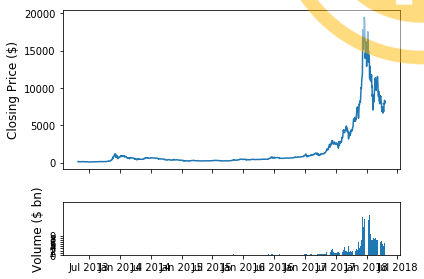

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax2.set_ylabel('Volume ($ bn)', fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i, j, 1) for i in range(2013, 2019) for j in [1, 7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i, j, 1) for i in range(2013, 2019) for j in [1, 7]])
ax2.set_xticklabels([datetime.date(i, j, 1).strftime('%b %Y') for i in range(2013, 2019) for j in [1, 7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime), bitcoin_market_info['bt_Open'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
fig.figimage(bitcoin_im, 100, 120, zorder=3, alpha=.5)
plt.show()

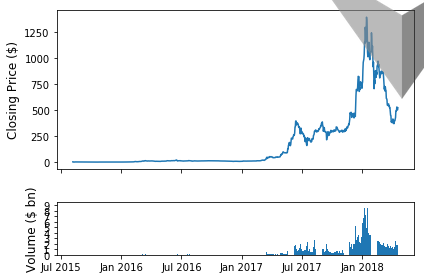

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax2.set_ylabel('Volume ($ bn)', fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i, j, 1) for i in range(2013, 2019) for j in [1, 7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i, j, 1) for i in range(2013, 2019) for j in [1, 7]])
ax2.set_xticklabels([datetime.date(i, j, 1).strftime('%b %Y')  for i in range(2013, 2019) for j in [1, 7]])
ax1.plot(eth_market_info['Date'].astype(datetime.datetime), eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'].astype(datetime.datetime).values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
fig.figimage(eth_im, 300, 180, zorder=3, alpha=.6)
plt.show()

In [8]:
market_info = pd.merge(bitcoin_market_info, eth_market_info, on=['Date'])
market_info = market_info[market_info['Date'] >= '2016-01-01']
for coins in ['bt_', 'eth_']: 
    kwargs = { coins + 'day_diff': lambda x: (x[coins + 'Close'] - x[coins + 'Open']) / x[coins + 'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2018-04-19,8159.27,8298.69,8138.78,8294.31,7063210000,138591000000,524.04,567.89,523.26,567.89,2256870000,51829900000,0.016551,0.083677
1,2018-04-18,7944.43,8197.80,7886.01,8163.42,6529910000,134926000000,503.31,525.09,503.05,524.79,1762940000,49769600000,0.027565,0.042677
2,2018-04-17,8071.66,8285.96,7881.72,7902.09,6900880000,137070000000,511.14,518.03,502.56,502.89,1760360000,50534000000,-0.021008,-0.016140
3,2018-04-16,8337.57,8371.15,7925.73,8058.67,5631310000,141571000000,532.07,534.20,500.25,511.15,1758980000,52592200000,-0.033451,-0.039318
4,2018-04-15,7999.33,8338.42,7999.33,8329.11,5244480000,135812000000,502.88,531.70,502.88,531.70,1726090000,49696300000,0.041226,0.057310


### Training, Test & Random Walks

We have some data, so now we need to build a model. In deep learning, the data is typically split into training and test sets. The model is built on the training set and subsequently evaluated on the unseen test set. In time series models, we generally train on one period of time and then test on another separate period. Rather arbitrarily, I'll set the cut-off date to June 1st 2017 (i.e. model will be trained on data before that date and assessed on data after it).

训练，测试以及随机游走

我们有了数据，现在可以开始创建模型了。在深度学习领域中，数据一般分为训练数据和测试数据，用训练数据集建立模型，然后用训练样本之外的测试数据集进行评估。

在时间序列模型中，一般我们用一段时间的数据训练，然后使用另一段时间的数据测试。我比较随意的把时间节点设为2017年6月1日（也就是说模型将用6月1日之前的数据训练，用其后的数据进行评估）。

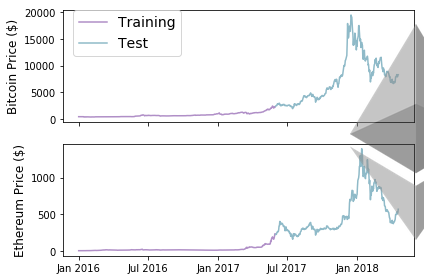

In [9]:
split_date = '2017-06-01'
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xticks([datetime.date(i, j, 1) for i in range(2013, 2019) for j in [1, 7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i, j, 1) for i in range(2013, 2019) for j in [1, 7]])
ax2.set_xticklabels([datetime.date(i, j, 1).strftime('%b %Y')  for i in range(2013, 2019) for j in [1, 7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)', fontsize=12)
ax2.set_ylabel('Ethereum Price ($)', fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0] * 0.65), int(bitcoin_im.size[1] * 0.65)), Image.ANTIALIAS), 
             200, 260, zorder=3, alpha=.5)
fig.figimage(eth_im.resize((int(eth_im.size[0] * 0.65), int(eth_im.size[1] * 0.65)), Image.ANTIALIAS), 
             350, 40, zorder=3, alpha=.5)
plt.show()

You can see that the training period mostly consists of periods when cryptos were relatively cheaper. As such, the training data may not be representative of the test data, undermining the model's ability to generalise to unseen data (you could try to make your data stationary- discussed [here](https://dashee87.github.io/data%20science/general/A-Road-Incident-Model-Analysis/)). But why let negative realities get in the way of baseless optimism? Before we take our deep artificially intelligent machine learning model to the moon, it's worth discussing a simpler model. The most basic model is to set tomorrow's price equal to today's price (which we'll crudely call a lag model). This is how we'd define such a model in mathematical terms:

\begin{align}
PredPrice_{t} & = ActualPrice_{t-1}
\end{align}

你可以观察到，训练集的数据大多处于货币价格较低的时候，因此，训练数据的分布也许并不能很好地代表测试数据的分布，这将削弱模型推广到样本外数据的能力（你可以参照这个网站把数据变换成平稳的时间序列）。

网站链接：
https://dashee87.github.io/data%2520science/general/A-Road-Incident-Model-Analysis/

但是为什么要让不如人意的现实干扰我们的分析呢？在我们带着深度人工智能机器模型起飞前，讨论一个更简单的模型是很有必要的。最简单的模型就是假设明天的价格相等于今天的价格，我们简单粗暴地称之为递延模型。下面我们用数学语言来定义这个模型：

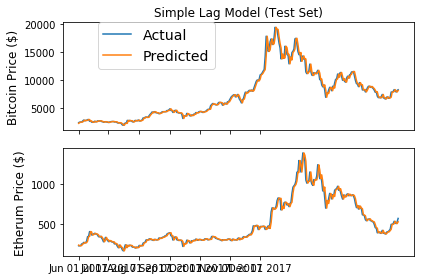

In [10]:
# trivial lag model: P_t = P_(t-1)
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()

Extending this trivial lag model, [stock prices are commonly treated as random walks](https://www.tcd.ie/Economics/assets/pdf/SER/2007/Samuel_Dupernex.pdf), which can be defined in these mathematical terms:

\begin{align}
PredPrice_{t} & = ActualPrice_{t-1} * \epsilon, \epsilon \sim N(\mu, \sigma)
\end{align}

We'll determine &mu; and &sigma; from the training sets and apply the random walk model to the Bitcoin and Ethereum test sets.

稍稍拓展一下这个简单的模型，一般人们认为股票的价格是随机漫步的，用数学模型表示为：

4361f2b38443327cb31a7966f56f91bae12fa41d

我们将从训练数据集中获取μ和σ的取值，然后在比特币和以太币的测试数据集上应用随机漫步模型。

First, we may want to make sure the daily change in price follows a normal distribution. We'll plot the histogram of values.

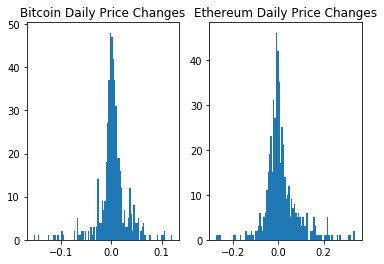

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(market_info[market_info['Date']< split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_info[market_info['Date']< split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
plt.show()

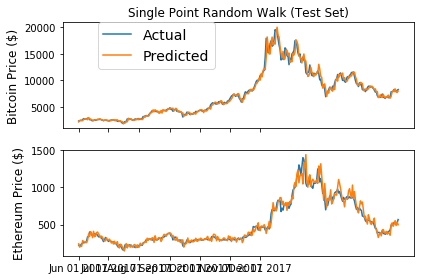

In [12]:
np.random.seed(202)
bt_r_walk_mean, bt_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
      market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

Wow! Look at those prediction lines. Apart from a few kinks, it broadly tracks the actual closing price for each coin. It even captures the eth rises (and subsequent falls) in mid-June and late August. At this stage, if I was to announce the launch of sheehanCoin, I'm sure that ICO would stupidly over-subscribed. As pointed out on that other blog, models that only make predictions one point into the future are often misleadingly accurate, as errors aren't carried over to subsequent predictions. No matter how large the error, it's essentially reset at each time point, as the model is fed the true price. The Bitcoin random walk is particularly deceptive, as the scale of the y-axis is quite wide, making the prediction line appear quite smooth.

Single point predictions are unfortunately quite common when evaluating time series models (e.g.[here](https://medium.com/@binsumi/neural-networks-and-bitcoin-d452bfd7757e) and [here](https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f)). A better idea could be to measure its accuracy on multi-point predictions. That way, errors from previous predictions aren't reset but rather are compounded by subsequent predictions. Thus, poor models are penalised more heavily. In mathematical terms:

\begin{align}
PredPrice_{t} & = PredPrice_{t-1} * \epsilon, \epsilon \sim N(\mu, \sigma)\ \&  \ PredPrice_0 = Price_0
\end{align}

Let's get our random walk model to predict the closing prices over the total test set.

哈哈，看看这些预测线，除了一些弯折，它基本追随了每个货币的实际收盘价格，它甚至预测了以太币在六月中旬及八月下旬的涨势（以及随后的跌势）。

那些仅仅只预测未来某个点的模型展现出来的准确性都很误导人，因为误差并不会延续到后续的预测中。无论上一个值有多大的误差，由于每个时间点的输入都是真实值，误差都会被重置。

比特币随机漫步模型尤其具有欺骗性，因为y轴的范围很大，让这个预测曲线看上去非常平滑。

不幸的是，单点预测在时间序列模型的评估中十分常见（比如文章一、文章二）。更好的做法是用多点预测来评估它的准确性，用这种方法，之前的误差不会被重置，而是被纳入之后的预测中。越是预测能力差的模型受到的限制也越严重。数学模型如下：

8481c8f592b7f349aa84a1de5c171db681516edf文章一链接：
https://medium.com/@binsumi/neural-networks-and-bitcoin-d452bfd7757e
8481c8f592b7f349aa84a1de5c171db681516edf文章二链接：
https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f

我们基于所有的测试数据集得到了随机漫步模型，并对收盘价格进行了预测。

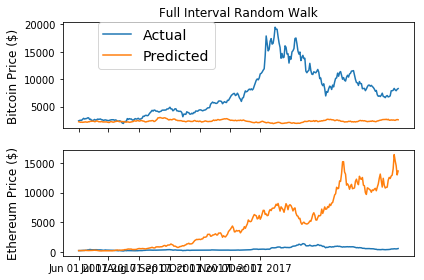

In [13]:
bt_random_walk = []
eth_random_walk = []
for n_step, (bt_step, eth_step) in enumerate(zip(bt_random_steps, eth_random_steps)):
    if n_step==0:
        bt_random_walk.append(market_info[market_info['Date']< split_date]['bt_Close'].values[0] * (bt_step+1))
        eth_random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         bt_random_walk[::-1], label='Predicted')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         eth_random_walk[::-1], label='Predicted')

ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

The model predictions are extremely sensitive to the random seed. I've selected one where the full interval random walk looks almost decent for Ethereum. In the [accompanying Jupyter notebook](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb), you can interactively play around with the seed value below to see how badly it can perform.

模型预测对随机种子的选取极度敏感，我已经选择了一个预测以太币结果较好的完全区间随机漫步模型。在相应的Jupyter笔记中，你可以通过交互界面尝试下面动图中的种子值，看看随机漫步模型表现差的情况。

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)
    random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_info[market_info['Date']< split_date]['eth_Close'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax1.set_xticklabels('')
    ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
    ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
    ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[(market_info['Date']+ datetime.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
             random_walk[::-1])
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    fig.text(0.0, 0.5, 'Ethereum Price ($)', va='center', rotation='vertical',fontsize=12)
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=200,max=210,step=1,value=205, description='Random Seed:'))

interactive(children=(IntSlider(value=205, description='Random Seed:', max=210, min=200), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_func>

Notice how the single point random walk always looks quite accurate, even though there's no real substance behind it. Hopefully, you'll be more suspicious of any blog that claims to accurately predict prices. I probably shouldn't worry; it's not like crypto fans to be seduced by [slick marketing claims](https://uetoken.com/).

需要注意的是，单点随机漫步总是看上去非常准确，即使其背后没有任何含义。希望你能够带着怀疑的眼光看任何宣称能够准确预测价格的文章。但也许我不需要担心，加密货币的爱好者们似乎并不会被虚有其表的广告语所诱惑。

## Long Short Term Memory (LSTM)

Like I said, if you're interested in the theory behind LSTMs, then I'll refer you to [this](http://colah.github.io/posts/2015-08-Understanding-LSTMs/), [this](http://blog.echen.me/2017/05/30/exploring-lstms/) and [this](http://www.bioinf.jku.at/publications/older/2604.pdf). Luckily, we don't need to build the network from scratch (or even understand it), there exists packages that include standard implementations of various deep learning algorithms (e.g. [TensorFlow](https://www.tensorflow.org/get_started/get_started), [Keras](https://keras.io/#keras-the-python-deep-learning-library), [PyTorch](http://pytorch.org/), etc.). I'll opt for Keras, as I find it the most intuitive for non-experts. If you're not familiar with Keras, then check out my [previous tutorial](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/).

长短期记忆（LSTM）

就像我之前所说的，如果你对LSTM的原理感兴趣，可以阅读：《理解LSTM网络》、《探究LSTM》、原始白皮书。（链接见上文）

幸运的是，我们不需要从头开始建立网络（甚至不需要理解它），我们可以运用一些包含多种深度学习算法标准实现的函数包（例如TensorFlow、 Keras,、PyTorch等等）。我将采用Keras，因为我发现对于非专业的爱好者来说，它是最直观的。如果你对Keras不熟悉，那么可以看看我之前推出的教程。

8481c8f592b7f349aa84a1de5c171db681516edfTensorFlow
https://www.tensorflow.org/get_started/get_started
8481c8f592b7f349aa84a1de5c171db681516edfKeras
https://keras.io/#keras-the-python-deep-learning-library
8481c8f592b7f349aa84a1de5c171db681516edfPyTorch
http://pytorch.org/
8481c8f592b7f349aa84a1de5c171db681516edf之前的教程
https://dashee87.github.io/data%2520science/deep%2520learning/python/another-keras-tutorial-for-neural-network-beginners/

In [15]:
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)

In [16]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
839,2016-01-01,434.33,36278900,-0.560641,0.020292,0.948024,206062,-0.418477,0.025040
838,2016-01-02,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913
837,2016-01-03,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792
836,2016-01-04,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943
835,2016-01-05,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236


I've created a new data frame called `model_data`. I've removed some of the previous columns (open price, daily highs and lows) and reformulated some new ones. `close_off_high` represents the gap between the closing price and price high for that day, where values of -1 and 1 mean the closing price was equal to the daily low or daily high, respectively. The `volatility` columns are simply the difference between high and low price divided by the opening price. You may also notice that `model_data` is arranged in order of earliest to latest. We don't actually need the date column anymore, as that information won't be fed into the model.

Our LSTM model will use previous data (both bitcoin and eth) to predict the next day's closing price of a specific coin. We must decide how many previous days it will have access to. Again, it's rather arbitrary, but I'll opt for 10 days, as it's a nice round number. We build little data frames consisting of 10 consecutive days of data (called windows), so the first window will consist of the 0-9th rows of the training set (Python is zero-indexed), the second will be the rows 1-10, etc.  Picking a small window size means we can feed more windows into our model; the downside is that the model may not have sufficient information to detect complex long term behaviours (if such things exist). 

Deep learning models don't like inputs that vary wildly. Looking at those columns, some values range between -1 and 1, while others are on the scale of millions. We need to normalise the data, so that our inputs are somewhat consistent. Typically, you want values between -1 and 1. The `off_high` and `volatility` columns are fine as they are. For the remaining columns, like that [other blog post](http://www.jakob-aungiers.com/articles/a/Multidimensional-LSTM-Networks-to-Predict-Bitcoin-Price), we'll normalise the inputs to the first value in the window.

我建好了一个新数据表格model_data，移除了部分列（开盘价，当日的价最高价、当日最低价），重新安排了新的列：close_off_high代表当天收盘价格和最高价格的差值，-1和1的值分别代表收盘价格与每日最低或者最高价格相等。

volatility列就是最高价和最低价的差值除以开盘价。你可能还会注意到model_data数据集是按照时间由古至今排列的。实际上模型输入不包括Date，所以我们不再需要这一列了。

我们的LSTM模型将会使用以往数据（比特币和以太币均有）来预测某一特定货币第二天的收盘价格。我们需要决定在模型中使用以往多少天的数据。

同样的，我又随意地决定选择使用之前10天的数据，因为10是一个很好的整数。我们用连续10天的数据（称之为窗口）建立了多个小数据表格，第一个窗口将由训练数据集中的第0-9行组成(Python从0开始计数)，下一个窗口由1-10行组成，以此类推。

选择较小的窗口规模意味着我们能在模型中使用更多的窗口，不利之处在于这个模型没有充足的信息以预测复杂长期行为（如果能够预测的话）。

深度学习并不喜欢变化范围大的输入值。观察一下这些列，有些值在-1到1之间，其他的值则达到了上百万。我们需要进行数据标准化，保证我们的输入值的变化范围是一致的。

一般-1到1的值是最理想的，off_high列和 volatility列的值是符合要求的，但是对于其他的列，我们需要把输入值按照窗口的第一行值进行标准化。

In [17]:
# we don't need the date columns anymore
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [18]:
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close','Volume']]

In [19]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

In [20]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

In [21]:
LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
839,0.000000,0.000000,-0.560641,0.020292,0.000000,0.000000,-0.418477,0.025040
838,-0.002049,-0.170410,0.250597,0.009641,-0.011498,0.239937,0.965898,0.034913
837,-0.009946,0.092475,-0.173865,0.020827,0.025190,0.978201,-0.317885,0.060792
836,-0.002855,0.060603,-0.474265,0.012649,0.006810,0.680295,-0.057657,0.047943
835,-0.005457,-0.048411,-0.013333,0.010391,0.002270,0.066829,0.697930,0.025236
834,-0.012019,-0.061645,-0.003623,0.012782,0.002991,0.498534,-0.214540,0.026263
833,0.054613,1.413585,-0.951499,0.069045,-0.006349,2.142074,0.681644,0.040587
832,0.043515,0.570968,0.294196,0.032762,0.040890,1.647747,-0.806717,0.055274
831,0.030576,-0.110282,0.814194,0.017094,0.040937,0.098121,-0.411897,0.019021
830,0.031451,-0.007801,-0.919598,0.017758,0.054014,0.896944,-0.938235,0.025266


This table represents an example of our LSTM model input (we'll actually have hundreds of similar tables). We've normalised some columns so that their values are equal to 0 in the first time point, so we're aiming to predict changes in price relative to this timepoint. We're now ready to build the LSTM model. This is actually quite straightforward with Keras, you simply stack componenets on top of each other (better explained [here](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/)).

表格展示了LSTM模型的输入的一部分（实际上会有几百个相似的表格）。我们对一些列进行了标准化处理，使它们在第一个时间点的值为0，以便预测相较此时间点而言价格的变动。

现在我们准备构建LSTM模型，实际上使用Keras来构建会非常简单，你只需将几个模块堆叠在一起。

更好的解释请戳这里：

https://dashee87.github.io/data%2520science/deep%2520learning/python/another-keras-tutorial-for-neural-network-beginners/

In [22]:
# I find it easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [23]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


So, the `build_model` functions constructs an empty model unimaginatively called model (`model = Sequential`), to which an LSTM layer is added. That layer has been shaped to fit our inputs (n x m tables, where n and m represent the number of timepoints/rows and columns, respectively). The function also includes more generic neural network features, like [dropout](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/) and [activation functions](https://dashee87.github.io/data%20science/deep%20learning/visualising-activation-functions-in-neural-networks/). Now, we just need to specify the number of neurons to place in the LSTM layer (I've opted for 20 to keep runtime reasonable), as well as the data on which the model will be trained.

不出所料，build_model 函数建立了一个空模型，名字为model(即这行代码model= Sequential),LSTM层已加在模型中，大小与输入相匹配（n * m的表格，n和m分别代表时间点/行和列）。

函数也包含了更通用的神经网络特征，例如 dropout和activation functions。现在我们只需确定放置到LSTM层中的神经元个数（我选择了20个以便保证合理的运行时间）和创建模型的训练数据。

In [24]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 4s - loss: 0.1648
Epoch 2/50
 - 3s - loss: 0.1117
Epoch 3/50
 - 3s - loss: 0.1064
Epoch 4/50
 - 4s - loss: 0.0952
Epoch 5/50
 - 4s - loss: 0.0870
Epoch 6/50
 - 3s - loss: 0.0848
Epoch 7/50
 - 3s - loss: 0.0835
Epoch 8/50
 - 3s - loss: 0.0801
Epoch 9/50
 - 3s - loss: 0.0788
Epoch 10/50
 - 3s - loss: 0.0784
Epoch 11/50
 - 3s - loss: 0.0752
Epoch 12/50
 - 3s - loss: 0.0743
Epoch 13/50
 - 3s - loss: 0.0740
Epoch 14/50
 - 3s - loss: 0.0690
Epoch 15/50
 - 3s - loss: 0.0675
Epoch 16/50
 - 3s - loss: 0.0691
Epoch 17/50
 - 4s - loss: 0.0746
Epoch 18/50
 - 4s - loss: 0.0681
Epoch 19/50
 - 3s - loss: 0.0709
Epoch 20/50
 - 3s - loss: 0.0697
Epoch 21/50
 - 3s - loss: 0.0687
Epoch 22/50
 - 3s - loss: 0.0704
Epoch 23/50
 - 3s - loss: 0.0667
Epoch 24/50
 - 3s - loss: 0.0679
Epoch 25/50
 - 3s - loss: 0.0681
Epoch 26/50
 - 3s - loss: 0.0657
Epoch 27/50
 - 3s - loss: 0.0664
Epoch 28/50
 - 3s - loss: 0.0646
Epoch 29/50
 - 3s - loss: 0.0690
Epoch 30/50
 - 3s - loss: 0.0688
Epoch 31/50
 - 3s -

If everything went to plan, then we'd expect the training error to have gradually decreased over time.

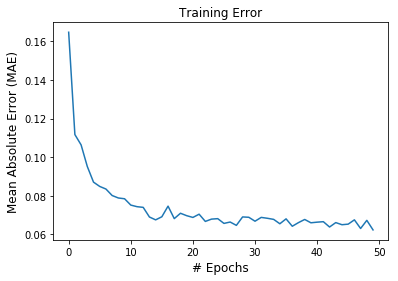

In [25]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('Training Error')

if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

We've just built an LSTM model to predict tomorrow's Ethereum closing price. Let's see how well it performs. We start by examining its performance on the training set (data before June 2017). That number below the code represents the model's mean absolute error (mae) on the training set after the 50th training iteration (or epoch). Instead of relative changes, we can view the model output as daily closing prices.

我们建好了一个LSTM模型，可以预测以太币明日的收盘价。让我们来看看模型表现如何。首先检验模型在训练集上的表现情况（2017年6月前的数据）。代码下面的数字是对训练集进行50次训练迭代（或周期）后，模型的平均绝对误差（mae）。我们可将模型的输出结果视为每日的收盘价，而不是相对的变化。

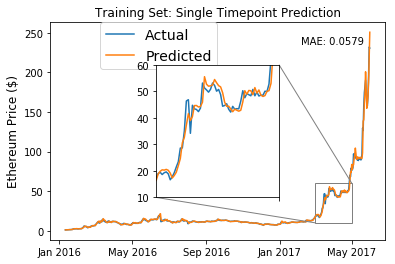

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close'].values[window_len:])/(training_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
axins.set_ylim([10,60])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

We shouldn't be too surprised by its apparent accuracy here. The model could access the source of its error and adjust itself accordingly. In fact, it's not hard to attain almost zero training errors. We could just cram in hundreds of neurons and train for thousands of epochs (a process known as overfitting, where you're essentially predicting noise- I included the `Dropout()` call in the `build_model` function to mitigate this risk for our relatively small model). We should be more interested in its performance on the test dataset, as this represents completely new data for the model.

正如我们所期待的，准确性看起来很高。训练过程中，模型可以了解其误差来源并相应地做出调整。

实际上，训练误差达到几乎为零不会很难，我们只需用上几百个神经元并且训练数千个周期（这就是过度拟合，实际上是在预测噪音，我在build_model 函数中加入了Dropout() ， 可以为我们相对小的模型降低过度拟合的风险）。

我们应该更关注模型在测试集上的表现，因为可以看到模型处理全新数据的表现。

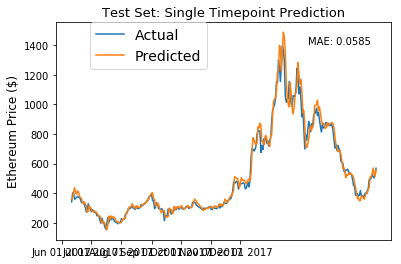

In [27]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close'].values[window_len:])/(test_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

Caveats aside about the misleading nature of single point predictions, our LSTM model *seems* to have performed well on the unseen test set. The most obvious flaw is that it fails to detect the inevitable downturn when the eth price suddenly shoots up (e.g mid-June and October). In fact, this is a persistent failure; it's just more apparent at these spikes. The predicted price regularly seems equivalent to the actual price just shifted one day later (e.g. the drop in mid-July). Furthermore, the model seems to be systemically overestimating the future value of Ether (join the club, right?), as the predicted line near always runs higher than the actual line. I suspect this is because the training data represents a period during which the price of Ether rose astronomically, so it expects that trend to continue (don't we all). We can also build a similar LSTM model for Bitcoin- test set predictions are plotted below (see [Jupyter notebook for full code](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb)).

撇开单点预测误导性的局限，LSTM模型似乎在测试集中表现良好。但它最明显的缺陷是以太币的价格在暴增后（例如六月中旬和十月）不可避免的下降，模型无法探测出来。

实际上这个问题一直存在，只是在这些剧烈变化的时间点更加明显。预测价格曲线几乎是实际价格曲线向未来平移一天的结果（例如七月中旬的下跌）。此外，模型似乎整体高估了以太币的未来价值（我们也是~），预测曲线总是高于实际曲线。

我怀疑这是由于训练集所属的时间范围内，以太币的价格以天文数字增长，因此模型推断这种趋势仍会持续（我们也是~）。我们也建立了一个相似的LSTM模型用来预测比特币，测试集的预测图如

In [28]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 4s - loss: 0.1007
Epoch 2/50
 - 3s - loss: 0.0630
Epoch 3/50
 - 3s - loss: 0.0451
Epoch 4/50
 - 3s - loss: 0.0426
Epoch 5/50
 - 3s - loss: 0.0375
Epoch 6/50
 - 3s - loss: 0.0333
Epoch 7/50
 - 3s - loss: 0.0300
Epoch 8/50
 - 3s - loss: 0.0321
Epoch 9/50
 - 3s - loss: 0.0312
Epoch 10/50
 - 3s - loss: 0.0293
Epoch 11/50
 - 3s - loss: 0.0273
Epoch 12/50
 - 3s - loss: 0.0288
Epoch 13/50
 - 3s - loss: 0.0272
Epoch 14/50
 - 3s - loss: 0.0278
Epoch 15/50
 - 3s - loss: 0.0277
Epoch 16/50
 - 3s - loss: 0.0272
Epoch 17/50
 - 3s - loss: 0.0263
Epoch 18/50
 - 3s - loss: 0.0260
Epoch 19/50
 - 3s - loss: 0.0257
Epoch 20/50
 - 3s - loss: 0.0258
Epoch 21/50
 - 3s - loss: 0.0242
Epoch 22/50
 - 3s - loss: 0.0244
Epoch 23/50
 - 4s - loss: 0.0246
Epoch 24/50
 - 3s - loss: 0.0256
Epoch 25/50
 - 3s - loss: 0.0236
Epoch 26/50
 - 3s - loss: 0.0251
Epoch 27/50
 - 3s - loss: 0.0241
Epoch 28/50
 - 3s - loss: 0.0236
Epoch 29/50
 - 4s - loss: 0.0248
Epoch 30/50
 - 4s - loss: 0.0244
Epoch 31/50
 - 3s -

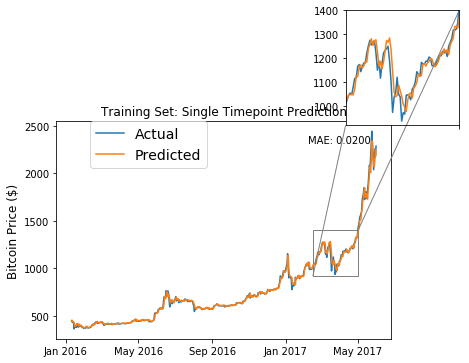

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['bt_Close'].values[window_len:])/(training_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
axins.set_ylim([920, 1400])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

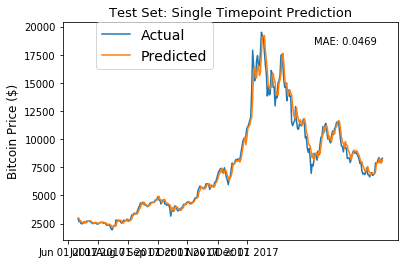

In [30]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         test_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close'].values[window_len:])/(test_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

As I've stated earlier, single point predictions can be deceptive. Looking more closely, you'll notice that, again, the predicted values regularly mirror the previous values (e.g. October). Our fancy deep learning LSTM model has partially reproducted a [autregressive (AR) model](https://dashee87.github.io/data%20science/general/A-Road-Incident-Model-Analysis/) of some order `p`, where future values are simply the weighted sum of the previous `p` values. We can define an AR model in these mathematical terms:  

\begin{align}
PredPrice_{t} & = \phi_0 + \phi_1*Price_{t-1} + \ldots + \phi_p*Price_{t-p} + \epsilon_t, \ \epsilon_t \sim N(0, \sigma)\
\end{align}

The good news is that AR models are commonly employed in time series tasks (e.g. [stock market prices](https://upcommons.upc.edu/bitstream/handle/2099/3572/04marcek.pdf)), so the LSTM model appears to have landed on a sensible solution. The bad news is that it's a waste of the LSTM capabilities, we could have a built a much simpler AR model in much less time and probably achieved similar results (though the title of this post would have been much less clickbaity). [More complex does not automatically equal more accurate](https://pdfs.semanticscholar.org/696c/2fa5697f58914921ff37d69ced44ddea143f.pdf)). 

We'll now build LSTM models to predict crypto prices for the next 5 days.

正如我之前所说的，单点预测会有欺骗作用。如果仔细观察你会注意到，预测值通常会反映出先前的值（例如十月）。深度学习模型LSTM已经部分推导出了p元自回归模型(autoregression model,AR)，未来的值仅仅是先前p个值的加权和。AR模型的数学公式如下：

4e28255a166b669dc0e00b13bdc88fcd36f9e118

好的方面是，AR模型常运用于时间序列中 ，因此LSTM模型似乎有了合理的用武之地。坏消息是，这是对LSTM能力的浪费，我们可以建立更加简单的AR模型，花费时间更少，可能会得到相似的结果。

In [31]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['eth_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['eth_Close'][i:i+pred_range].values/
                                  training_set['eth_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 5s - loss: 0.2213
Epoch 2/50
 - 4s - loss: 0.1576
Epoch 3/50
 - 3s - loss: 0.1449
Epoch 4/50
 - 3s - loss: 0.1378
Epoch 5/50
 - 3s - loss: 0.1286
Epoch 6/50
 - 3s - loss: 0.1256
Epoch 7/50
 - 3s - loss: 0.1244
Epoch 8/50
 - 3s - loss: 0.1266
Epoch 9/50
 - 3s - loss: 0.1205
Epoch 10/50
 - 3s - loss: 0.1201
Epoch 11/50
 - 3s - loss: 0.1172
Epoch 12/50
 - 3s - loss: 0.1201
Epoch 13/50
 - 3s - loss: 0.1161
Epoch 14/50
 - 3s - loss: 0.1179
Epoch 15/50
 - 3s - loss: 0.1171
Epoch 16/50
 - 3s - loss: 0.1197
Epoch 17/50
 - 3s - loss: 0.1152
Epoch 18/50
 - 3s - loss: 0.1166
Epoch 19/50
 - 3s - loss: 0.1162
Epoch 20/50
 - 4s - loss: 0.1146
Epoch 21/50
 - 3s - loss: 0.1133
Epoch 22/50
 - 3s - loss: 0.1120
Epoch 23/50
 - 3s - loss: 0.1125
Epoch 24/50
 - 3s - loss: 0.1100
Epoch 25/50
 - 3s - loss: 0.1147
Epoch 26/50
 - 3s - loss: 0.1108
Epoch 27/50
 - 3s - loss: 0.1127
Epoch 28/50
 - 3s - loss: 0.1112
Epoch 29/50
 - 4s - loss: 0.1122
Epoch 30/50
 - 3s - loss: 0.1108
Epoch 31/50
 - 5s -

In [32]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['bt_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['bt_Close'][i:i+pred_range].values/
                                  training_set['bt_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 5s - loss: 0.1042
Epoch 2/50
 - 6s - loss: 0.0645
Epoch 3/50
 - 6s - loss: 0.0528
Epoch 4/50
 - 4s - loss: 0.0482
Epoch 5/50
 - 4s - loss: 0.0446
Epoch 6/50
 - 4s - loss: 0.0438
Epoch 7/50
 - 3s - loss: 0.0419
Epoch 8/50
 - 4s - loss: 0.0407
Epoch 9/50
 - 3s - loss: 0.0413
Epoch 10/50
 - 4s - loss: 0.0412
Epoch 11/50
 - 4s - loss: 0.0394
Epoch 12/50
 - 4s - loss: 0.0393
Epoch 13/50
 - 4s - loss: 0.0395
Epoch 14/50
 - 3s - loss: 0.0392
Epoch 15/50
 - 3s - loss: 0.0384
Epoch 16/50
 - 4s - loss: 0.0397
Epoch 17/50
 - 3s - loss: 0.0383
Epoch 18/50
 - 4s - loss: 0.0380
Epoch 19/50
 - 3s - loss: 0.0387
Epoch 20/50
 - 6s - loss: 0.0384
Epoch 21/50
 - 4s - loss: 0.0383
Epoch 22/50
 - 4s - loss: 0.0381
Epoch 23/50
 - 3s - loss: 0.0375
Epoch 24/50
 - 3s - loss: 0.0367
Epoch 25/50
 - 3s - loss: 0.0373
Epoch 26/50
 - 3s - loss: 0.0377
Epoch 27/50
 - 3s - loss: 0.0372
Epoch 28/50
 - 3s - loss: 0.0369
Epoch 29/50
 - 4s - loss: 0.0376
Epoch 30/50
 - 4s - loss: 0.0358
Epoch 31/50
 - 3s -

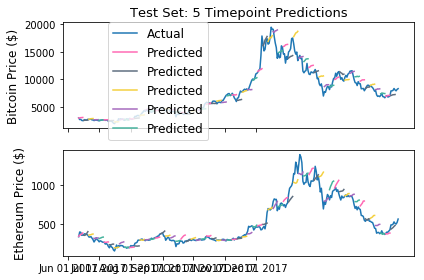

In [33]:
# little bit of reformatting the predictions to closing prices
eth_pred_prices = ((eth_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['eth_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))
bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['bt_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['bt_Close'][window_len:], label='Actual')
ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close'][window_len:], label='Actual')
for i, (eth_pred, bt_pred) in enumerate(zip(eth_pred_prices, bt_pred_prices)):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
    ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
             eth_pred, color=pred_colors[i%5])
ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.set_xticklabels('')
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})
fig.tight_layout()
plt.show()

The predictions are visibly less impressive than their single point counterparts. Nevertheless, I'm pleased that the model returned somewhat nuanced behaviours (e.g. the second line on the eth graph); it didn't simply forecast prices to move uniformly in one direction. So there are some grounds for optimism.

Moving back to the single point predictions, our deep machine artificial neural model looks okay, but so did that boring random walk model. Like the random walk model, LSTM models can be sensitive to the choice of random seed (the model weights are initially randomly assigned). So, if we want to compare the two models, we'll run each one multiple (say, 25) times to get an estimate for the model error. The error will be calculated as the absolute difference between the actual and predicted closing prices changes in the test set.

这个预测结果显然没有单点预测的结果吸引眼球。然而，我很开心这个模型输出有些微妙的状况（例如以太币的第二条线）；它并没有简单的预测价格会朝着一个方向统一移动，这是个好现象。

回过头来看一下单点预测，深度机器人工神经模型运行的还可以，但随机漫步模型也不差。和随机漫步模型一样，LSTM模型对随机种子的选择也很敏感（模型的权重最初是随机分配的）。

因此，如果我们想去比较这两个模型，就需要多次运行（大约25次）之后获取模型误差的估计值，测试集中实际和预测的收盘价之间差值的绝对值记为误差。

In [34]:
# warning: this cell may take some time to execute
# this code builds 25 LSTM models for eth and bitcoin each (with 25 different initialisations)
# the models are then saved so you hopefully only need to run this cell once

# random seed for reproducibility
# for rand_seed in range(775,800):
#     print(rand_seed)
#     np.random.seed(rand_seed)
#     temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
#     temp_model.fit(LSTM_training_inputs,
#                  (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1,
#                  epochs=50, batch_size=1, verbose=0, shuffle=True)
#     temp_model.save('eth_model_randseed_%d.h5'%rand_seed)
#     temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
#     temp_model.fit(LSTM_training_inputs,
#                  (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1,
#                  epochs=50, batch_size=1, verbose=0, shuffle=True)
#     temp_model.save('bt_model_randseed_%d.h5'%rand_seed)

In [35]:
# assuming the previous cell was completed, this cell loads in the different initialisations
# and calculates the average mean absolute error (mae)

from keras.models import load_model

eth_preds = []
bt_preds = []
for rand_seed in range(775,800):
    temp_model = load_model('eth_model_randseed_%d.h5'%rand_seed)
    eth_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['eth_Close'].values[window_len:]/test_set['eth_Close'].values[:-window_len]-1))))
    temp_model = load_model('bt_model_randseed_%d.h5'%rand_seed)
    bt_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['bt_Close'].values[window_len:]/test_set['bt_Close'].values[:-window_len]-1))))

OSError: Unable to open file (unable to open file: name = 'eth_model_randseed_775.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [36]:
eth_random_walk_preds = []
bt_random_walk_preds = []
for rand_seed in range(775,800):
    np.random.seed(rand_seed)
    eth_random_walk_preds.append(
        np.mean(np.abs((np.random.normal(eth_r_walk_mean, eth_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['eth_Close'][window_len:])/np.array(test_set['eth_Close'][:-window_len]))))
    bt_random_walk_preds.append(
    np.mean(np.abs((np.random.normal(bt_r_walk_mean, bt_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['bt_Close'][window_len:])/np.array(test_set['bt_Close'][:-window_len]))))

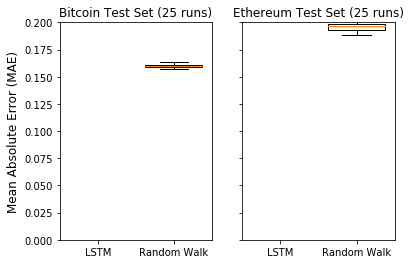

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot([bt_preds, bt_random_walk_preds],widths=0.75)
ax1.set_ylim([0, 0.2])
ax2.boxplot([eth_preds, eth_random_walk_preds],widths=0.75)
ax2.set_ylim([0, 0.2])
ax1.set_xticklabels(['LSTM', 'Random Walk'])
ax2.set_xticklabels(['LSTM', 'Random Walk'])
ax1.set_title('Bitcoin Test Set (25 runs)')
ax2.set_title('Ethereum Test Set (25 runs)')
ax2.set_yticklabels('')
ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.show()

Maybe AI is worth the hype after all! Those graphs show the error on the test set after 25 different initialisations of each model. The LSTM model returns an average error of about 0.04 and 0.05 on the bitcoin and eth prices, respectively, crushing the corresponding random walk models.

Aiming to beat random walks is a pretty low bar. It would be more interesting to compare the LSTM model against more appropriate time series models (weighted average, autoregression, [ARIMA](https://dashee87.github.io/data%20science/general/A-Road-Incident-Model-Analysis/) or Facebook's [Prophet algorithm](https://github.com/facebook/prophet)). On the other hand, I'm sure it wouldn't be hard to improve our LSTM model (gratuitously adding more layers and/or neurons, changing the batch size, learning rate, etc.). That said, hopefully you've detected my scepticism when it comes to applying deep learning to predict changes in crypto prices. That's because we're overlooking the best framework of all: human intelligence. Clearly, the perfect model* for predicting cryptos is:

\begin{align}
& Price^{Crypto}_{t} > Price^{Crypto}_{t-1} \,  \forall \ Crypto \neq OmiseGo \textrm{, }  \\
& \textrm{  where } Price^{Crypto}_{t} \to moon \textrm{, as } t \to    \infty           
\end{align}

&#42; This blog does not constitute financial advice and should not be taken as such. While cryptocurrency investments will definitely go up in value forever, they may also go down.

## Summary

We've collected some crypto data and fed it into a supercool deeply intelligent machine learning LSTM model. Unfortunately, its predictions were not that different from just spitting out the previous value. How can we make the model learn more sophisticated behaviours?

* **Change Loss Function**: MAE doesn't really encourage risk taking. For example, under mean squared error (MSE), the LSTM model would be forced to place more importance on detecting spikes/troughs. [More bespoke trading focused loss functions](http://www.faculty.ucr.edu/~taelee/paper/lossfunctions.pdf) could also move the model towards less conservative behaviours.

* **Penalise conservative AR-type models**: This would incentivise the deep learning algorithm to explore more risky/interesting models. Easier said than done!

* **Get more and/or better data**: If past prices alone are sufficient to decently forecast future prices, we need to include other features that provide comparable predictive power. That way, the LSTM model wouldn't be so reliant on past prices, potentially unlocking more complex behaviours. This is probably the best and hardest solution.

If that's the positive spin, then the negative reality is that it's entirely possible that there is no detectable pattern to changes in crypto prices; that no model (however deep) can separate the signal from the noise (similar to the merits of using [deep learning to predict earthquakes](https://www.scientificamerican.com/article/can-artificial-intelligence-predict-earthquakes/)). And any pattern that does appear [can disappear as quickly](http://site.iugaza.edu.ps/wdaya/files/2013/03/A-Random-Walk-Down-Wall-Street.pdf) (see [efficient market hypothesis](results_merge.click2)). Just think how different Bitcoin in 2016 is to craze-riding Bitcoin of late 2017. Any model built on 2016 data would surely struggle to replicate these unprecedented movements. All of this suggests you might as well save yourself some time and stick to autoregression (unless you're writing a blog, of course).

But I'm sure they'll eventually find some use cases for deep learning. In the meantime, you can build your own LSTM model by downloading the Python code [here](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb). Thanks for reading!

也许AI还是值得广而告之的，上图显示了对每个模型进行25次初始化后测试集的误差。LSTM模型在比特币和以太币上价格的平均误差分别是0.04和0.05，这个结果完胜随机漫步模型。

战胜随机漫步模型是很低的标准，将LSTM与更合适的时间序列模型做比较会更有趣（比如加权平均，AR，ARIMA 或Facebook的 Prophet algorithm）。另一方面，我相信改进LSTM模型并不难（尝试加入更多层和/或神经元，改变批次的大小，学习率等）。

也就是说，希望你已经发现了我对应用深度学习预测加密货币的价格变化的疑虑。这是因为我们忽视了最好的框架：人类智能。显然，预测加密货币的完美模型*应是：

3f6c30b3b48deacd3f0deb436f4bdd0b2de40229

（译者注：如果在时过境迁之后，加密货币的价格接近月球的高度，那么所有不在OmiseGo区块链中的加密货币会一直升值）

*本篇文章不涉及财务建议，也不应该做财务建议使用。尽管加密货币的投资在长时间的范围看肯定会增值，但它们也可能会贬值。

总结

我们收集了一些加密货币数据，并将其输入到酷炫的深度智能机器学习LSTM模型中，不幸的是，预测值与先前的输入值并无太大差别。那么问题来了，如何使模型学习更复杂的行为？

8481c8f592b7f349aa84a1de5c171db681516edf改变损失函数：平均绝对误差（MAE）使模型中规中矩，得不到“出格”的结果。例如，如果采用均方误差（MSE），LSTM模型会被迫更加重视检测高峰值/低谷值。 许多定制交易的损失函数也会使模型朝着没那么保守的方向演化。
8481c8f592b7f349aa84a1de5c171db681516edf限制保守的AR类模型：这会激励深度学习算法来探索更具风险/有趣的模型。不过说起来容易做起来难啊。
获取更多且/或更好的数据：如果过去的价格已经足以预测较为准确的未来价格，那么我们需要引入其他具有相当预测能力的特征。这样LSTM模型不会过度依赖过去的价格，也8481c8f592b7f349aa84a1de5c171db681516edf许会解锁更复杂的行为，这可能是最可靠同时也是最难完成的解决方案。
如果以上是积极的一面，那接下来的负面消息是，有可能加密货币的价格变化模式根本找不出来；没有任何模型（无论多么深）可以将信号与噪音分开（这与利用深度学习预测地震类似），即使出现了某种模式也会很快消失 。

想想看2016年和2017年末狂热的比特币差别多么大，任何建立在2016年数据的模型肯定难以复刻2017年空前的变化。以上讨论就是在建议你，不妨节省些时间，还是坚持研究AR模型吧。

但我相信他们最终会为深度学习找到用武之地，与此同时，你可以通过下载 Python 代码建立自己的LSTM模型。